# Regresión lineal

## Ejemplo 1 

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [74]:
x=np.array([-1,0,1,2])
y=np.array([0,1,2,1])

In [75]:
ctes=linregress(x, y)
linregress(x,y) #Dentro de Scipy

LinregressResult(slope=0.4, intercept=0.8, rvalue=0.6324555320336759, pvalue=0.36754446796632423, stderr=0.34641016151377546)

In [76]:
punto_x=float(input("Que punto en x quiere predecir?"))
punto_y=ctes.intercept+ctes.slope*punto_x
print("La coordenada del punto buscado es x= ",punto_x," y= ",punto_y)

Que punto en x quiere predecir?.5
La coordenada del punto buscado es x=  0.5  y=  1.0


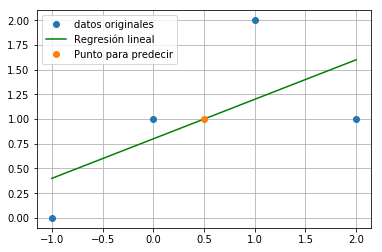

In [77]:
plt.plot(x, y, 'o', label='datos originales')
plt.plot(x, ctes.intercept+ctes.slope*x, 'g', label='Regresión lineal')
plt.plot(punto_x,punto_y,"o",label='Punto para predecir')
plt.legend()
plt.grid()
plt.show()

## Ejercicio 1

Se presenta la temperatura de ebucción de la acetona a diferentes presiones:

| T(c) | 56.5 | 113 | 181 | 214.5 |
| --- | --- | --- | --- | --- |
| P(atm) | 1 | 5 | 20 | 40 |

### Lineal

In [83]:
T=np.array([56.5,113.0,181,214.5]) #En centigrados
P=np.array([1,5,20,40]) #En atmósferas
ctes=linregress(T, P)
linregress(T,P)

LinregressResult(slope=0.23441922787036262, intercept=-16.611715936688718, rvalue=0.9356184802442705, pvalue=0.06438151975572946, stderr=0.06254173628500383)

In [85]:
punto_P=float(input("Con que presión quiere predecir temperatura?"))
punto_T=(-ctes.intercept + punto_P)/ctes.slope
print("La coordenada del punto buscado es T= ",punto_T," P= ",punto_P)

Con que presión quiere predecir temperatura?2
La coordenada del punto buscado es T=  79.39500571591883  P=  2.0


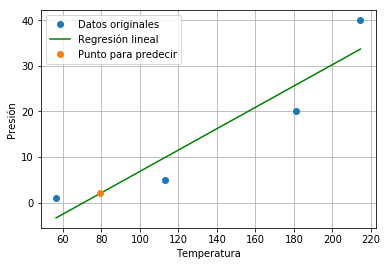

In [86]:
plt.plot(T, P, 'o', label='Datos originales')
plt.plot(T, ctes.intercept + ctes.slope*T, 'g', label='Regresión lineal')
plt.plot(punto_T,punto_P,'o',label='Punto para predecir')
plt.legend()
plt.grid()
plt.xlabel("Temperatura")
plt.ylabel("Presión")
plt.show()

### Cuadrática

In [94]:
from scipy.optimize import curve_fit

def acetona(x,a,b,c):
    return a+b*x+c*(x**2)  #Se define una función objetivo

(A,B,C),_ =curve_fit(acetona,T,P) #Tomamos solo los parámetros y lo demás lo despreciamos
print("A= ",A,"B= ",B,"C= ",C)


A=  12.923319909317803 B=  -0.31479761493027064 C=  0.0020285263538236077


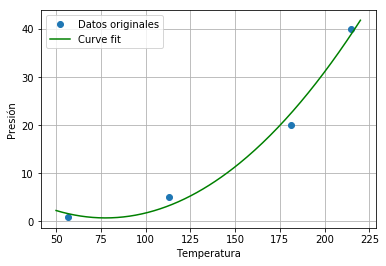

In [96]:
datos_x=np.linspace(50,220,200) #generamos un array desde 50 a 220 con 200 puntos

plt.plot(T, P, 'o', label='Datos originales')
plt.plot(datos_x, acetona(datos_x,A,B,C), 'g', label='Curve fit')
plt.legend()
plt.grid()
plt.xlabel("Temperatura")
plt.ylabel("Presión")
plt.show()